## **Modelación de los datos**


**Modelo SLR (Regresión lineal simple)**
La regresión lineal es un modelo estadístico que examina la relación lineal entre dos (Regresión lineal simple) o más (Regresión lineal múltiple) variables: una variable dependiente y una o varias variables independientes. La relación lineal básicamente significa que cuando una (o más) variables independientes aumentan (o disminuyen), la variable dependiente aumenta (o disminuye) también.

Ecuación: ***y = mx + b***

**Modelo MLR (Regresión lineal múltiple)**
En la mayoría de los casos, tendremos más de una variable independiente: tendremos múltiples variables; puede ser tan pequeño como dos variables independientes y hasta cientos (o teóricamente incluso miles) de variables.

Ecuación: ***y = b0 + b1X1 + b2X2***


Hay dos formas principales de realizar una regresión lineal en Python: con las librerías: **statsmodels** y con **scikit-learn**.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

datos_mall = pd.read_csv("Mall_Customers.csv")

ID = datos_mall['CustomerID']
Gender = datos_mall['Gender']
Age = datos_mall['Age']
Income = datos_mall['Annual Income (k$)']
Spend = datos_mall['Spending Score (1-100)']


# **Modelo SLR (Regresión lineal simple)**

Ejercicio **sin** la constante b0

In [ ]:
import statsmodels.api as sm   # Proporciona clases y funciones para la estimación de muchos modelos estadísticos diferentes, pruebas estadísticas y exploración de datos estadísticos".

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#Ejercicio de promedio de calificaciones y salario inicial

X = Age
y = Spend

modelo = sm.OLS(y, X).fit()      # OJO con el orden de los argumentos --> sm.OLS(output, input)
predictions = modelo.predict(X)

modelo.summary()
#Se espera una ecuación de este tipo:  Y = 14.81 + 5.71x, r2=0.97, estimar y(3) = 31.93

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   OLS Regression Results                                  
===========================================================================================
Dep. Variable:     Spending Score (1-100)   R-squared (uncentered):                   0.619
Model:                                OLS   Adj. R-squared (uncentered):              0.618
Method:                     Least Squares   F-statistic:                              323.9
Date:                    Sat, 14 May 2022   Prob (F-statistic):                    1.28e-43
Time:                            01:44:24   Log-Likelihood:                         -993.76
No. Observations:                     200   AIC:                                      1990.
Df Residuals:                         199   BIC:                                      1993.
Df Model:                               1                                                  
Covariance Type:                nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Age            1.0759      0.060     17.997      0.000       0.958       1.194
==============================================================================
Omnibus:                       54.784   Durbin-Watson:                   3.280
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               10.094
Skew:                          -0.003   Prob(JB):                      0.00643
Kurtosis:                       1.899   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
modelo.params

Age    1.075927
dtype: float64

Ejercicio **con** la constante b0

Para agregar una constante al modelo, hay que configurarlo usando el comando X = sm.add_constant(X) donde X es el nombre del DataFrame que contiene las variables de entrada (independientes).

In [ ]:
import statsmodels.api as sm 

X = Age
y = Spend

X = sm.add_constant(X)   # se agrega la intercepción, la ordenada al origen (beta_0) el modelo

modelo = sm.OLS(y, X).fit()         # sm.OLS(output, input)
predictions = modelo.predict(X)

modelo.summary()

#Se espera una ecuación de este tipo:  Y = 14.81 + 5.71x, r2=0.97, estimar y(3) = 31.93

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     Spending Score (1-100)   R-squared:                       0.107
Model:                                OLS   Adj. R-squared:                  0.103
Method:                     Least Squares   F-statistic:                     23.74
Date:                    Sat, 14 May 2022   Prob (F-statistic):           2.25e-06
Time:                            01:44:32   Log-Likelihood:                -922.22
No. Observations:                     200   AIC:                             1848.
Df Residuals:                         198   BIC:                             1855.
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         73.7012      5.124     14.384      0.000      63.597      83.805
Age           -0.6049      0.124     -4.873      0.000      -0.850      -0.360
==============================================================================
Omnibus:                       10.095   Durbin-Watson:                   3.451
Prob(Omnibus):                  0.006   Jarque-Bera (JB):                5.957
Skew:                          -0.250   Prob(JB):                       0.0509
Kurtosis:                       2.318   Cond. No.                         122.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
modelo.params


const    73.701191
Age      -0.604921
dtype: float64

In [ ]:
modelo.mse_resid

598.4565633674733

https://www.cienciadedatos.net/documentos/py10-regresion-lineal-python.html

# **Modelo Lineal Múltiple**

In [ ]:
df = pd.read_csv('Mall_Customers.csv')
df



In [ ]:
edad = df['Age']
#edad
gast = df['Spending Score (1-100)']
df2 = pd.DataFrame({
    'edad': edad,
    'Gastos': gast
})
df2

In [ ]:
import statsmodels.api as sm 

datos = pd.read_csv('Mall_Customers.csv')

X = df2
y = datos["Annual Income (k$)"]

#X[0] = [0, 2, 2.5, 1, 4, 7]
#X[1] = [0, 1, 2, 3, 6, 2]
#y = [5, 10, 9, 0, 3, 27]

X = sm.add_constant(X)   # se agrega la intercepción, la ordenada al origen (beta_0) el modelo

modelo = sm.OLS(y, X).fit()

predictions = modelo.predict(X)  # Con el modelo, se calculan las Y´s

modelo.summary()

#Se espera una ecuación de este tipo:  Y = 5 + 4x1 -3x2,   r2=1, estimar y(5.5, 3) = 18

In [ ]:
predictions

# **Regresión lineal con la librería SciKit Learn**

SKLearn es prácticamente el estándar de oro cuando se trata de aprendizaje
automático en Python. Tiene muchos algoritmos de aprendizaje, para regresión, clasificación, agrupamiento y reducción de dimensionalidad.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
dataset = pd.read_csv('Mall_Customers.csv')
x = dataset.iloc[:, :1].values #CANTIDAD DE CLIENTES
y = dataset.iloc[:, -1].values   #GASTO

In [ ]:
x

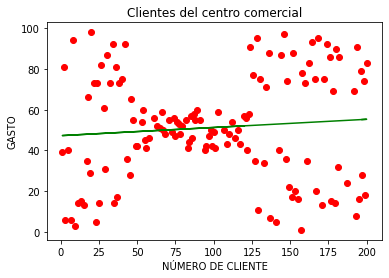

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 1/3)    # Se dividen los datos para entrenamiento y prueba

from sklearn.linear_model import LinearRegression    # Clase de regresión lineal

lr = LinearRegression()    #objeto de la clase que será el modelo de regresión lineal

lr.fit(x_train, y_train)   #método para "ajustar" el modelo al conjunto de datos. Es decir, el regresor "estudia" los datos y "aprende" de ellos

y_pred = lr.predict(x_test) #probar el modelo

#Visualización de los datos

plt.scatter(x_train, y_train, color = "red")  # diagrama de dispersión para trazar las observaciones reales
plt.plot(x_train, lr.predict(x_train), color = "green") # Para la línea de regresión, se usa x_train en el eje x y las predicciones de las observaciones en el eje y.
plt.title("Clientes del centro comercial")
plt.xlabel("NÚMERO DE CLIENTE")
plt.ylabel("GASTO")
plt.show()


In [ ]:
y_pred

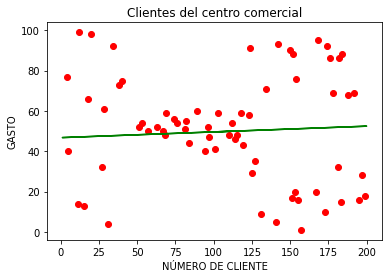

In [ ]:
#Se repite la misma tarea para el conjunto de datos de prueba

plt.scatter(x_test, y_test, color = "red")    # diagrama de dispersión para trazar las observaciones reales
plt.plot(x_train, lr.predict(x_train), color = "green")   # Para la línea de regresión, se usa x_train en el eje x y las predicciones de las observaciones en el eje y.
plt.title("Clientes del centro comercial")
plt.xlabel("NÚMERO DE CLIENTE")
plt.ylabel("GASTO")
plt.show()

## **K-means**

El algoritmo trabaja iterativamente para asignar a cada “punto” (las filas de nuestro conjunto de entrada forman una coordenada) uno de los “K” grupos basado en sus características. Son agrupados en base a la similitud de sus features (las columnas). Como resultado de ejecutar el algoritmo tendremos:

*   Los “centroids” de cada grupo que serán unas “coordenadas” de cada uno de los K conjuntos que se utilizarán para poder etiquetar nuevas muestras.
*   Etiquetas para el conjunto de datos de entrenamiento. Cada etiqueta perteneciente a uno de los K grupos formados.

Los grupos se van definiendo de manera “orgánica”, es decir que se va ajustando su posición en cada iteración del proceso, hasta que converge el algoritmo. Una vez hallados los centroids deberemos analizarlos para ver cuales son sus características únicas, frente a la de los otros grupos. Estos grupos son las etiquetas que genera el algoritmo.


Ref. 
https://www.aprendemachinelearning.com/k-means-en-python-paso-a-paso/ 

K-Means Clustering in Python: A Practical Guide, https://realpython.com/k-means-clustering-python/


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min

%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

In [ ]:
dataset.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
dataset.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
print(dataset.groupby('Annual Income (k$)').size())

Annual Income (k$)
15     2
16     2
17     2
18     2
19     4
      ..
103    4
113    2
120    2
126    2
137    2
Length: 64, dtype: int64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


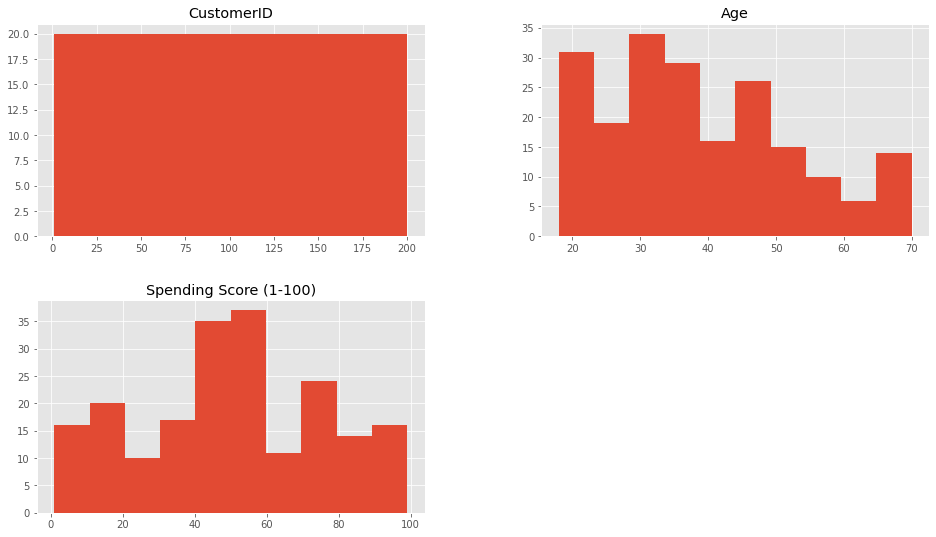

In [ ]:
dataset.drop(['Annual Income (k$)'],1).hist()
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


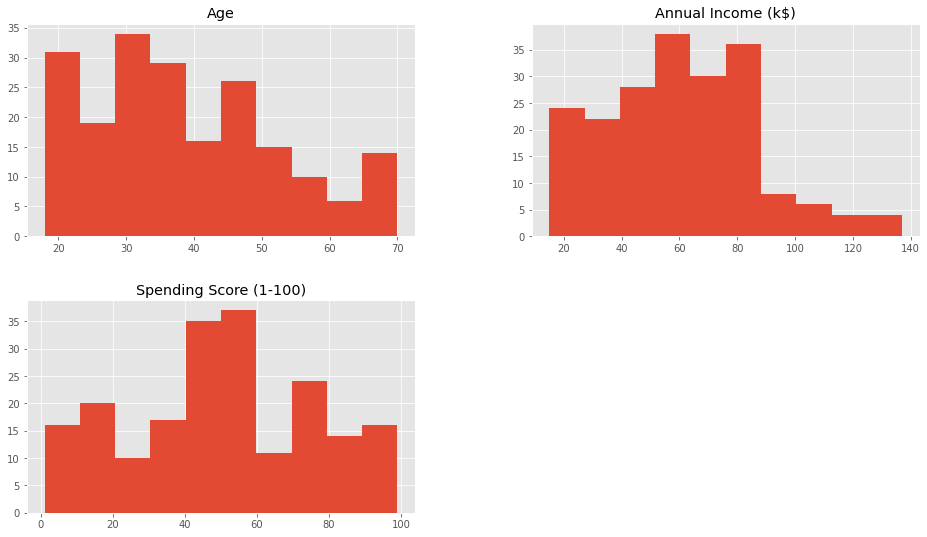

In [ ]:
dataset.drop(['CustomerID'],1).hist()
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


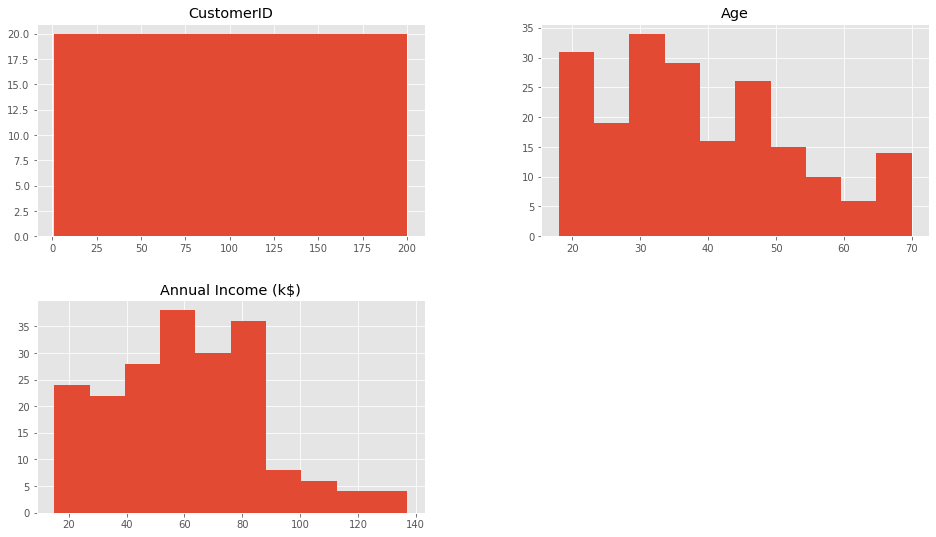

In [ ]:
dataset.drop(['Spending Score (1-100)'],1).hist()
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


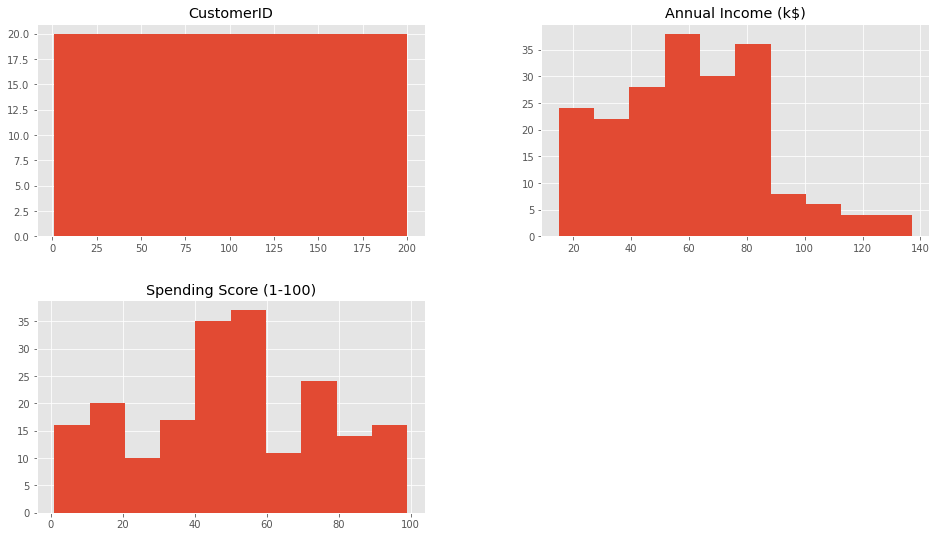

In [ ]:
dataset.drop(['Age'],1).hist()
plt.show()

In [ ]:
sb.pairplot(dataset.dropna(), hue='CustomerID',size=4,vars=["Spending Score (1-100)","Age","Annual Income (k$)"],kind='1')

In [ ]:
X = np.array(dataset[["Spending Score (1-100)","Age","Annual Income (k$)"]])
y = np.array(dataset['CustomerID'])
X.shape

(200, 3)